In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 8)
!date

%load_ext autoreload
%autoreload 2

Wed Nov 13 09:45:15 PST 2019


# Bias in TC and SC as a function of Privacy Loss Budget and Diversity Index

In [2]:
import dp_2020_census.data, dp_2020_census.model

In [3]:
df_orig = dp_2020_census.data.load_orig_counts()

In [4]:
stratification_cols = ['state', 'county', 'enum_dist',]

In [5]:
df_new = {}
for epsilon in '0.25 0.50 0.75 1.0 2.0 4.0 6.0 8.0'.split():
    for run in '1234':
        df_new[epsilon, run] = dp_2020_census.data.load_dp_counts(epsilon, run)


In [6]:
def find_dp_bias(stratification_cols=['state', 'county', 'enum_dist'],
                 result_name='tc_enum_dist'):
    results = {}

    df_orig = dp_2020_census.data.load_orig_counts()

    # calculate maximum number of cells
    potential_cells = 1
    for col in ['age', 'race', 'eth']:
        if col not in stratification_cols:
            potential_cells *= df_orig[col].nunique()

    def count_empty_cells(df):
        actual_cells = 1
        for col in ['age', 'race', 'eth']:
            if col not in stratification_cols:
                actual_cells *= df[col].nunique()
        return potential_cells - actual_cells


    for epsilon in '0.25 0.50 0.75 1.0 2.0 4.0 6.0 8.0'.split():
        epsilon_underscore = epsilon.replace('.', '_')
        key = f'{result_name}_{epsilon_underscore}'
        print(key, end=' - ')
    
        error = {}
        for run in '1234':
            error[run] = dp_2020_census.model.perturbation_error(
                df_orig, df_new[epsilon, run], stratification_cols)

        empty_cells = df_orig.groupby(stratification_cols).apply(count_empty_cells)
        error['homogeneity'] = empty_cells
        
        all_error = list(error['1']) + list(error['2']) + list(error['3']) + list(error['4'])
        all_homogeneity = list(error['homogeneity'])*4
        
        bias = pd.Series(all_error).groupby(all_homogeneity).mean()
        
        for h in bias.index:
            results[f'{key}_{h}_bias'] = f'{bias[h]:.01f}'
        
        print(np.round(bias.values, 1))

    return results
# results.update(find_dp_bias(['state', 'age', 'race', 'eth'], 'sc_state'))


In [ ]:
%%time

results = {}

results.update(find_dp_bias(['state'], 'tc_state'))
results.update(find_dp_bias(['state', 'county'], 'tc_county'))
results.update(find_dp_bias(['state', 'county', 'enum_dist'], 'tc_enum_dist'))

# results.update(find_dp_bias(['state', 'age', 'race', 'eth'], 'sc_state'))
# results.update(find_dp_bias(['state', 'county', 'age', 'race', 'eth'], 'sc_county'))
# results.update(find_dp_bias(['state', 'county', 'enum_dist', 'age', 'race', 'eth'], 'sc_enum_dist'))

len(results)

tc_state_0_25 - [0 0]
tc_state_0_50 - [0 0]
tc_state_0_75 - [0 0]
tc_state_1_0 - [0 0]
tc_state_2_0 - [0 0]
tc_state_4_0 - [0 0]
tc_state_6_0 - [0 0]
tc_state_8_0 - [0 0]
tc_county_0_25 - [-103.7  -21.1  -16.3    1.8   21.2   37.1   41.2   23.4]
tc_county_0_50 - [-59.2 -22.6  -7.7   2.7  12.1  17.4  25.3  21.7]
tc_county_0_75 - [-42.8 -16.   -4.9   1.6   8.3  17.6  19.2  19.1]
tc_county_1_0 - [-33.9 -14.8  -2.9   1.2   7.   12.1  14.   14.5]
tc_county_2_0 - [-18.8  -7.1  -2.8   0.6   4.    9.5   8.   11.1]
tc_county_4_0 - [-10.4  -4.4  -1.9   0.5   2.2   3.8   5.    6. ]
tc_county_6_0 - [-7.2 -3.6 -1.4  0.4  1.6  2.2  3.4  3.3]
tc_county_8_0 - [-5.3 -2.8 -1.1  0.3  1.3  1.   2.7  2.7]
tc_enum_dist_0_25 - [-52.6 -34.3 -17.2 -16.4 -17.7  -8.5 -10.5   2.1  28.    8.7  41.6]
tc_enum_dist_0_50 - [-31.7 -21.3 -13.  -10.3 -11.4  -5.1  -6.5   1.4  12.5   5.4  23.5]
tc_enum_dist_0_75 - [-22.1 -15.8 -10.3  -7.8 -12.5  -4.   -4.8   1.1  18.8   4.2  16.5]
tc_enum_dist_1_0 - [-18.9 -13.7  -8.   -6.

In [ ]:
import json
with open('/ihme/homes/abie/projects/2019/dp_2020_census/results_dp_bias.json', 'w') as f:
    json.dump(results, f, indent=4)

In [ ]:
results['tc_county_8_0_18_bias']

In [ ]:
results

In [ ]:
def plot_dp_bias(epsilon='1.0',
                 stratification_cols=['state', 'county', 'enum_dist']):
    results = {}

    # calculate maximum number of cells
    potential_cells = 1
    for col in ['age', 'race', 'eth']:
        if col not in stratification_cols:
            potential_cells *= df_orig[col].nunique()

    def count_empty_cells(df):
        actual_cells = 1
        for col in ['age', 'race', 'eth']:
            if col not in stratification_cols:
                actual_cells *= df[col].nunique()
        return potential_cells - actual_cells


    epsilon_underscore = epsilon.replace('.', '_')
    error = {}
    for run in '1234':
        error[run] = dp_2020_census.model.perturbation_error(
            df_orig, df_new[epsilon, run], stratification_cols)

    empty_cells = df_orig.groupby(stratification_cols).apply(count_empty_cells)
    error['homogeneity'] = empty_cells

    all_error = list(error['1']) + list(error['2']) + list(error['3']) + list(error['4'])
    all_homogeneity = list(error['homogeneity'])*4
        
    bias = pd.Series(all_error).groupby(all_homogeneity).mean()

#     plt.plot(bias.index, bias.values, 'o')
    return all_error, all_homogeneity, bias

all_error, all_homogeneity, bias = plot_dp_bias(stratification_cols=['state', 'county', 'enum_dist'])


In [ ]:
len(all_error)

In [ ]:
homogeneity = np.unique(all_homogeneity)

In [ ]:
all_error, all_homogeneity, bias = plot_dp_bias(epsilon='1.0', stratification_cols=['state', 'county', 'enum_dist'])
err_by_hom_1 = [np.array(all_error)[np.where(np.array(all_homogeneity) == h)] for h in homogeneity]

In [ ]:
all_error, all_homogeneity, bias = plot_dp_bias(epsilon='0.50', stratification_cols=['state', 'county', 'enum_dist'])
err_by_hom_0_50 = [np.array(all_error)[np.where(np.array(all_homogeneity) == h)] for h in homogeneity]

In [ ]:
all_error, all_homogeneity, bias = plot_dp_bias(epsilon='2.0', stratification_cols=['state', 'county', 'enum_dist'])
err_by_hom_2 = [np.array(all_error)[np.where(np.array(all_homogeneity) == h)] for h in homogeneity]

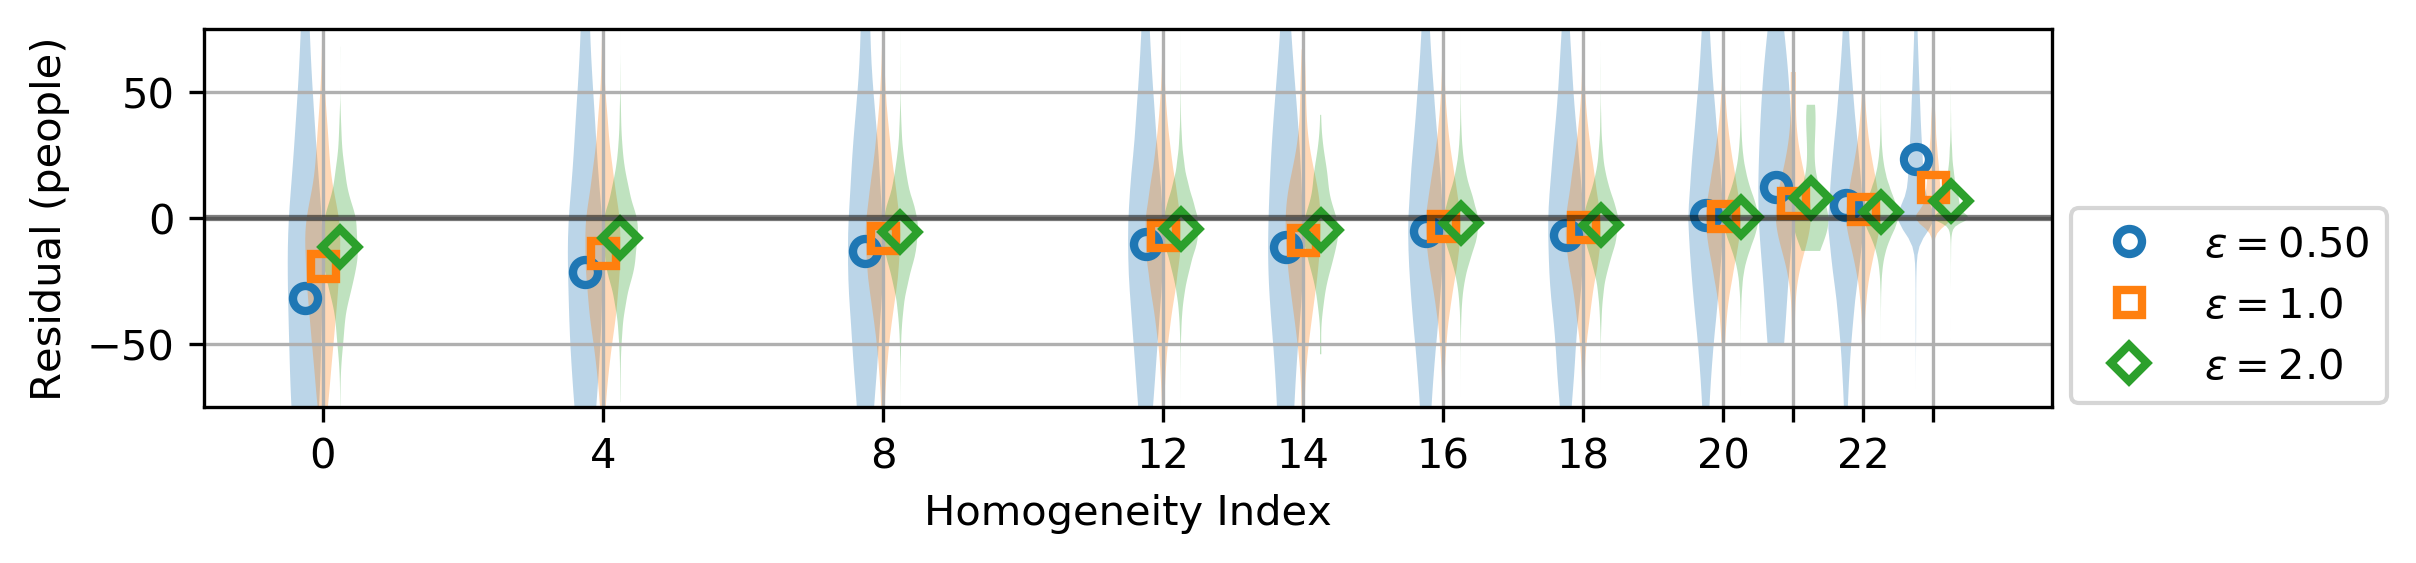

In [47]:
plt.figure(figsize=(8.5, 2), dpi=300)
def my_violin(dataset, positions, label, color, marker):
    plt.violinplot(dataset, positions=positions, showmeans=False, showextrema=False)
    yy = [np.mean(d_i) for d_i in dataset]
    plt.plot(positions, yy, marker, color='none', mec=color, mew=2, label=label)

my_violin(err_by_hom_0_50, positions=homogeneity-.25, label='$\epsilon = 0.50$', color='C0', marker='o')
my_violin(err_by_hom_1, positions=homogeneity, label='$\epsilon = 1.0$', color='C1', marker='s')
my_violin(err_by_hom_2, positions=homogeneity+.25, label='$\epsilon = 2.0$', color='C2', marker='D')

plt.axis(ymin=-75, ymax=75)

plt.grid()
plt.axhline(0, color='k', alpha=.5)
plt.xlabel('Homogeneity Index')
plt.ylabel('Residual (people)')
plt.xticks(homogeneity, [0,4,8,12,14,16,18,20,'', 22, '']);
plt.legend(loc=(1.01, .01))
plt.subplots_adjust(right=.85, bottom=.25)
plt.savefig('/ihme/homes/abie/projects/2019/dp_2020_census/fig_3_homogeneity_bias.png');

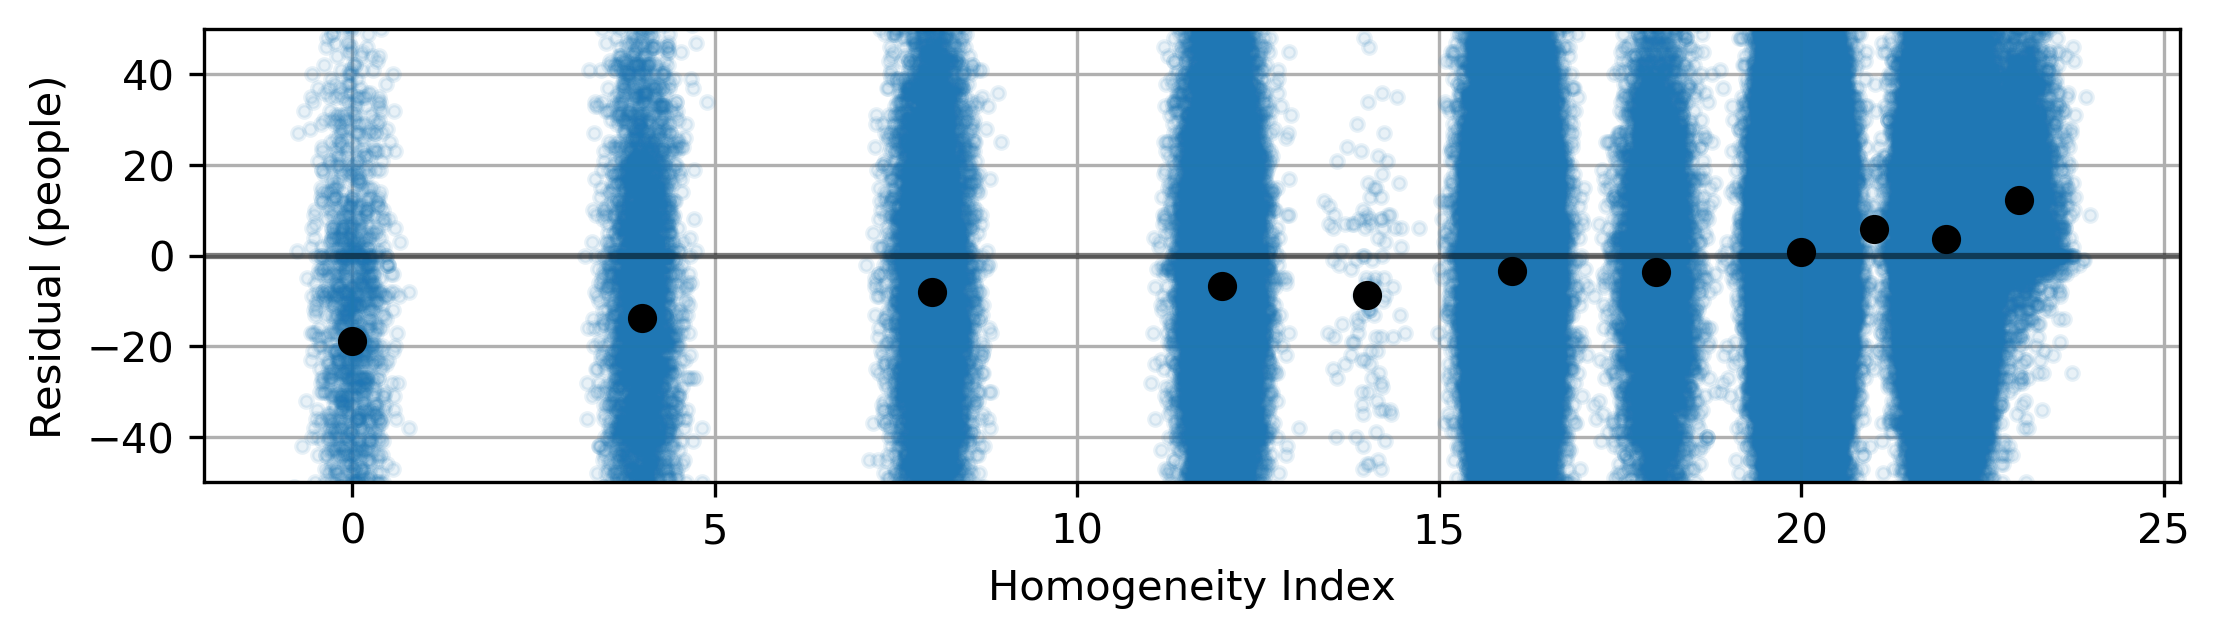

In [43]:
# plt.figure(figsize=(8.5, 2), dpi=300)

    
# jitter = np.random.normal(scale=.25, size=len(all_homogeneity))
# plt.plot(all_homogeneity+jitter, all_error, '.', color='C0', alpha=.1, label='Enumeration District')

# plt.plot(bias.index.values, bias.values, 'o', color='k')
# plt.axis(ymin=-50, ymax=50)

# plt.grid()
# plt.axhline(0, color='k', alpha=.5)
# plt.xlabel('Homogeneity Index')
# plt.ylabel('Residual (people)')

# plt.savefig('/ihme/homes/abie/projects/2019/dp_2020_census/fig_3_homogeneity_bias.png')

In [ ]:
# consider showing only the means and for a few different values of epsilon (similar to figure 1)